In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

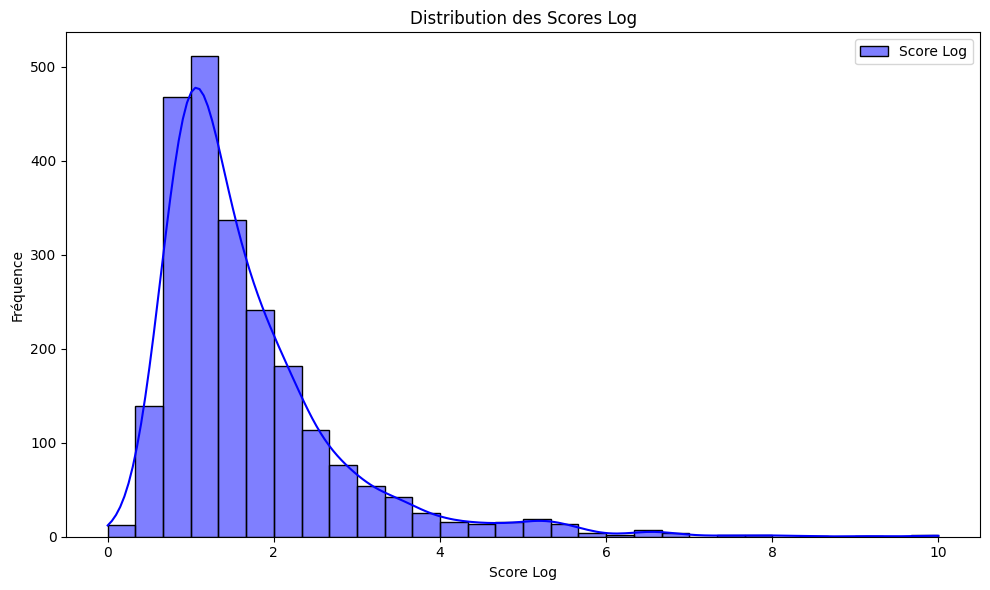

In [55]:
# Distribution des scores (score_log)
plt.figure(figsize=(10, 6))
sns.histplot(df1['score_log'], kde=True, bins=30, color='blue', label='Score Log')
plt.title("Distribution des Scores Log")
plt.xlabel("Score Log")
plt.ylabel("Fréquence")
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
df1 = pd.read_csv('df_ML3.csv')
df1

,id,title,release_date,genres,language,popularity,vote_count,vote_average,overview,genre_names,...,Thriller,War,Western,release_year,release_month,budget,revenue,runtime,production_companies,production_countries
0,1197306,A Working Man,2025-03-26,"[28, 80, 53]",en,633.0389,480.0,6.385,Levon Cade left behind a decorated military ca...,"['Action', 'Crime', 'Thriller']",...,1,0,0,2025.0,3.0,40000000.0,89722806.0,116.0,"['Cedar Park Entertainment', 'BlockFilm', 'Pun...","['GB', 'US']"
1,668489,Havoc,2025-04-24,"[28, 80, 53]",en,580.3429,281.0,6.600,When a drug heist swerves lethally out of cont...,"['Action', 'Crime', 'Thriller']",...,1,0,0,2025.0,4.0,90000000.0,0.0,107.0,"['XYZ Films', 'Severn Screen', 'One More One P...","['GB', 'US']"
2,950387,A Minecraft Movie,2025-03-31,"[10751, 35, 12, 14]",en,423.6209,752.0,6.200,Four misfits find themselves struggling with o...,"['Family', 'Comedy', 'Adventure', 'Fantasy']",...,0,0,0,2025.0,3.0,150000000.0,874636560.0,101.0,"['Warner Bros. Pictures', 'Legendary Pictures'...","['SE', 'US']"
3,324544,In the Lost Lands,2025-02-27,"[14, 12, 28]",en,307.5934,294.0,6.300,A queen sends the powerful and feared sorceres...,"['Fantasy', 'Adventure', 'Action']",...,0,0,0,2025.0,2.0,55000000.0,4755330.0,102.0,"['Constantin Film', 'Spark Productions']","['DE', 'CH']"
4,822119,Captain America: Brave New World,2025-02-12,"[28, 53, 878]",en,253.9094,1663.0,6.154,After meeting with newly elected U.S. Presiden...,"['Action', 'Thriller', 'Science Fiction']",...,1,0,0,2025.0,2.0,180000000.0,414757293.0,119.0,"['Marvel Studios', 'Kevin Feige Productions']",['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,60935,The Thing,2011-10-12,"[27, 878, 9648]",en,7.7850,2989.0,6.225,When paleontologist Kate Lloyd travels to an i...,"['Horror', 'Science Fiction', 'Mystery']",...,0,0,0,2011.0,10.0,35000000.0,31505287.0,103.0,"['Universal Pictures', 'Morgan Creek Entertain...",['US']
2303,1047373,The Silent Hour,2024-10-03,"[80, 53, 28]",en,5.9119,191.0,6.563,"While working a case as an interpreter, a hear...","['Crime', 'Thriller', 'Action']",...,1,0,0,2024.0,10.0,0.0,322064.0,99.0,"['AGC Studios', 'Meridian Pictures', 'Orogen E...","['US', 'MT']"
2304,9415,Murder at 1600,1997-04-18,"[28, 18, 9648, 53, 80]",en,8.6223,542.0,6.100,A secretary is found dead in a White House bat...,"['Action', 'Drama', 'Mystery', 'Thriller', 'Cr...",...,1,0,0,1997.0,4.0,40000000.0,25804707.0,107.0,"['Kopelson Entertainment', 'Regency Enterprise...",['US']
2305,9884,Collateral Damage,2002-02-06,"[28, 53, 18]",en,7.9877,1396.0,5.760,Firefighter Gordon Brewer is plunged into the ...,"['Action', 'Thriller', 'Drama']",...,1,0,0,2002.0,2.0,85000000.0,78382433.0,108.0,"['David Foster Productions', 'Hacienda Product...",['US']


In [3]:
df1.columns

Index(['id', 'title', 'release_date', 'genres', 'language', 'popularity',
       'vote_count', 'vote_average', 'overview', 'genre_names', 'genres_str',
       'popularity_score', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'release_year', 'release_month', 'budget',
       'revenue', 'runtime', 'production_companies', 'production_countries'],
      dtype='object')

In [4]:
df1['score_minmax'] = (df1['popularity'] - df1['popularity'].min()) / (df1['popularity'].max() - df1['popularity'].min()) * 10


In [5]:
df1['score_quantile'] = df1['popularity'].rank(pct=True) * 10


In [6]:
import numpy as np
log_pop = np.log1p(df1['popularity'])
df1['score_log'] = (log_pop - log_pop.min()) / (log_pop.max() - log_pop.min()) * 10


In [7]:
C = df1['vote_average'].mean()
m = df1['vote_count'].quantile(0.50)
df1['score_bayesian'] = (
    (df1['vote_count'] / (df1['vote_count'] + m)) * df1['vote_average'] +
    (m / (df1['vote_count'] + m)) * C
)
# Normalisation entre 0 et 10
df1['score_bayesian'] = (df1['score_bayesian'] - df1['score_bayesian'].min()) / (df1['score_bayesian'].max() - df1['score_bayesian'].min()) * 10

In [8]:
# Suppression des colonnes inutiles
df1 = df1.drop(columns=[
    'id', 'overview', 'title', 'genres_str', 'language', 'original_language',
], errors='ignore')

In [9]:
# Extraire l'année et le mois de sortie du film
if 'release_date' in df1.columns:
    df1['release_year'] = pd.to_datetime(df1['release_date'], errors='coerce').dt.year
    df1['release_month'] = pd.to_datetime(df1['release_date'], errors='coerce').dt.month

In [10]:
# Créer une colonne bénéfice (profit), sauf si budget ou revenue est 0
mask_valid = (df1['budget'] > 0) & (df1['revenue'] > 0)
df1['profit'] = 0
df1.loc[mask_valid, 'profit'] = df1.loc[mask_valid, 'revenue'] - df1.loc[mask_valid, 'budget']

In [11]:
# Ajouter le nombre de sociétés et de pays de production
df1['num_production_companies'] = df1['production_companies'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
df1['num_production_countries'] = df1['production_countries'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)


In [12]:
# Supprimer les colonnes numérisées précédemment
if 'num_production_companies' in df1.columns:
    df1.drop(columns=['num_production_companies'], inplace=True)
if 'num_production_countries' in df1.columns:
    df1.drop(columns=['num_production_countries'], inplace=True)

# Extraire les deux premières compagnies de production
def extract_first_two(lst):
    if isinstance(lst, str):
        try:
            parsed = eval(lst)
            return parsed[:2] + [None] * (2 - len(parsed))
        except:
            return [None, None]
    return [None, None]

company_cols = df1['production_companies'].apply(extract_first_two)
df1['prod_company_1'] = company_cols.apply(lambda x: x[0])
df1['prod_company_2'] = company_cols.apply(lambda x: x[1])

In [13]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

df1['prod_company_1_encoded'] = le1.fit_transform(df1['prod_company_1'].astype(str))
df1['prod_company_2_encoded'] = le2.fit_transform(df1['prod_company_2'].astype(str))


In [14]:
# Fonction pour extraire les deux premiers pays de production
def extract_first_two_countries(lst):
    if isinstance(lst, str):
        try:
            parsed = eval(lst)
            return parsed[:2] + [None] * (2 - len(parsed))
        except:
            return [None, None]
    return [None, None]

# Application à la colonne 'production_countries'
country_cols = df1['production_countries'].apply(extract_first_two_countries)
df1['prod_country_1'] = country_cols.apply(lambda x: x[0])
df1['prod_country_2'] = country_cols.apply(lambda x: x[1])

# Encodage avec LabelEncoder
from sklearn.preprocessing import LabelEncoder

le_country_1 = LabelEncoder()
le_country_2 = LabelEncoder()

df1['prod_country_1_encoded'] = le_country_1.fit_transform(df1['prod_country_1'].astype(str))
df1['prod_country_2_encoded'] = le_country_2.fit_transform(df1['prod_country_2'].astype(str))


In [15]:
from collections import Counter

# Étape 1 : compter les présences globales de chaque pays
all_countries = df1['prod_country_1'].astype(str).tolist() + df1['prod_country_2'].astype(str).tolist()
country_freq = Counter(all_countries)

# Étape 2 : fonction pour attribuer la somme des fréquences des deux pays
def map_country_frequency(row):
    freq1 = country_freq.get(str(row['prod_country_1']), 0)
    freq2 = country_freq.get(str(row['prod_country_2']), 0)
    return freq1 + freq2

# Étape 3 : nouvelle colonne numérique
df1['prod_country_freq'] = df1.apply(map_country_frequency, axis=1)


In [16]:
# Créer une colonne bénéfice (profit), sauf si budget ou revenue est 0
mask_valid = (df1['budget'] > 0) & (df1['revenue'] > 0)
df1['profit'] = 0
df1.loc[mask_valid, 'profit'] = df1.loc[mask_valid, 'revenue'] - df1.loc[mask_valid, 'budget']

In [17]:
from collections import Counter

# Étape 1 : concaténer toutes les compagnies encodées
all_companies = df1['prod_company_1_encoded'].tolist() + df1['prod_company_2_encoded'].tolist()
company_freq = Counter(all_companies)

# Étape 2 : fonction pour additionner les fréquences de chaque ligne
def map_company_frequency(row):
    freq1 = company_freq.get(row['prod_company_1_encoded'], 0)
    freq2 = company_freq.get(row['prod_company_2_encoded'], 0)
    return freq1 + freq2

# Étape 3 : ajout de la colonne de fréquence
df1['prod_company_freq'] = df1.apply(map_company_frequency, axis=1)


In [18]:
# Définir les colonnes de genres à exclure
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music','genre_weighted_score','genre_freq',
    'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'prod_country_combined_encoded', 'prod_country_combined', 'prod_company_1_encoded', 'prod_company_2_encoded','prod_country_1_encoded', 'prod_country_2_encoded'
]


In [19]:
import ast
from collections import Counter

# Étape 1 — Parser proprement genre_names (liste de strings)
def parse_genre_names(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else []
    except:
        return []

df1['genre_names_clean'] = df1['genre_names'].apply(parse_genre_names)

# Étape 2 — Extraire les 3 premiers genres
df1['genre_1'] = df1['genre_names_clean'].apply(lambda x: x[0] if len(x) > 0 else None)
df1['genre_2'] = df1['genre_names_clean'].apply(lambda x: x[1] if len(x) > 1 else None)
df1['genre_3'] = df1['genre_names_clean'].apply(lambda x: x[2] if len(x) > 2 else None)

# Étape 3 — Calcul des fréquences globales
all_genres = df1['genre_1'].tolist() + df1['genre_2'].tolist() + df1['genre_3'].tolist()
genre_freq = Counter([g for g in all_genres if g is not None])

# Étape 4 — Score par ligne = somme des fréquences des genres principaux
def genre_frequency_score(row):
    return sum([
        genre_freq.get(row['genre_1'], 0),
        genre_freq.get(row['genre_2'], 0),
        genre_freq.get(row['genre_3'], 0)
    ])

df1['genre_freq'] = df1.apply(genre_frequency_score, axis=1)

In [20]:
from collections import defaultdict
from statistics import mean

# Étape 3 : Calcul de la moyenne du score_log par genre
genre_score_pairs = []
for _, row in df1.iterrows():
    genres = row['genre_names_clean']
    score = row['score_log']  # ou 'score_bayesian'
    for g in genres:
        genre_score_pairs.append((g, score))

genre_scores = defaultdict(list)
for g, s in genre_score_pairs:
    genre_scores[g].append(s)

genre_avg_score = {g: mean(scores) for g, scores in genre_scores.items()}

# Étape 4 : Calcul de la fréquence brute de chaque genre
from collections import Counter
genre_freq = Counter([g for sub in df1['genre_names_clean'] for g in sub])

# Étape 5 : Score pondéré = fréquence * moyenne
genre_weighted_score = {g: genre_avg_score[g] * genre_freq[g] for g in genre_avg_score}

# Étape 6 : Appliquer à chaque film
def genre_weighted(row):
    return sum([
        genre_weighted_score.get(row['genre_1'], 0),
        genre_weighted_score.get(row['genre_2'], 0),
        genre_weighted_score.get(row['genre_3'], 0)
    ])

df1['genre_weighted_score'] = df1.apply(genre_weighted, axis=1)


In [21]:
# 1. Créer une liste de lignes (genre, score) pour tous les genres
genre_score_pairs = []

for _, row in df1.iterrows():
    genres = row['genre_names_clean']
    score = row['score_log']  # ou 'score_bayesian'
    for g in genres:
        genre_score_pairs.append((g, score))

# 2. Calcul de la moyenne de score par genre
from collections import defaultdict
from statistics import mean

genre_scores = defaultdict(list)
for g, s in genre_score_pairs:
    genre_scores[g].append(s)

genre_avg_score = {g: mean(scores) for g, scores in genre_scores.items()}

# 3. Score par ligne = somme des scores moyens de ses genres principaux
def genre_impact_score(row):
    return sum([
        genre_avg_score.get(row['genre_1'], 0),
        genre_avg_score.get(row['genre_2'], 0),
        genre_avg_score.get(row['genre_3'], 0)
    ])

df1['genre_impact_score'] = df1.apply(genre_impact_score, axis=1)


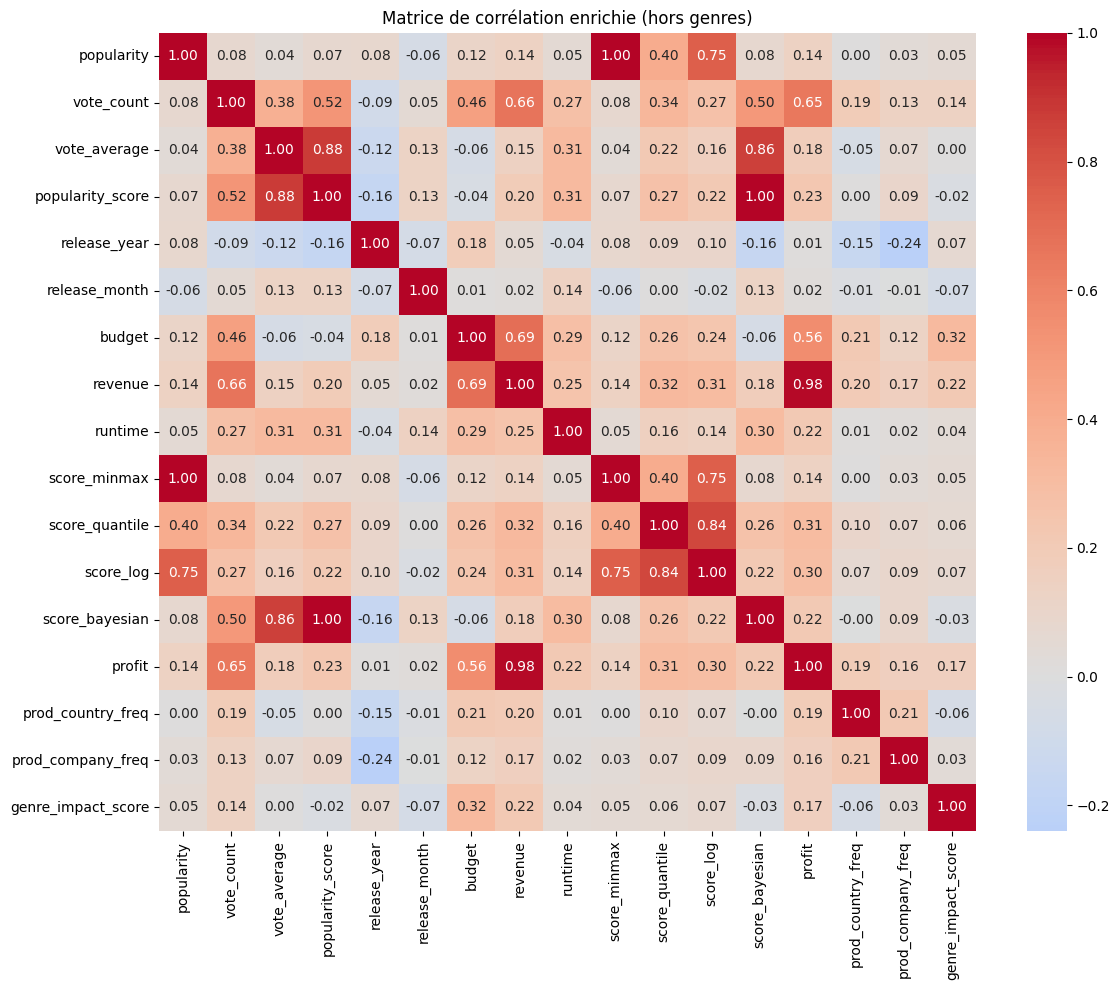

In [22]:
# Garde toutes les colonnes numériques sauf celles des genres et overview_length
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in genre_cols and col != 'overview_length']

# Matrice de corrélation
correlation_matrix = df1[numerical_cols].corr()

# Affichage de la heatmap centrée sur 0
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation enrichie (hors genres)")
plt.tight_layout()
plt.show()

In [56]:
df1.columns

Index(['release_date', 'genres', 'popularity', 'vote_count', 'vote_average',
       'genre_names', 'popularity_score', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'release_year',
       'release_month', 'budget', 'revenue', 'runtime', 'production_companies',
       'production_countries', 'score_minmax', 'score_quantile', 'score_log',
       'score_bayesian', 'profit', 'prod_company_1', 'prod_company_2',
       'prod_company_1_encoded', 'prod_company_2_encoded', 'prod_country_1',
       'prod_country_2', 'prod_country_1_encoded', 'prod_country_2_encoded',
       'prod_country_freq', 'prod_company_freq', 'genre_names_clean',
       'genre_1', 'genre_2', 'genre_3', 'genre_freq', 'genre_weighted_score',
       'genre_impact_score'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

features_quantile = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year', 'prod_company_freq','genre_impact_score', 'prod_country_freq']
X_q = df1[features_quantile]
y_q = df1['score_quantile']

Xq_train, Xq_test, yq_train, yq_test = train_test_split(X_q, y_q, test_size=0.2, random_state=42)
model_q = LGBMRegressor(random_state=42)
model_q.fit(Xq_train, yq_train)
yq_pred = model_q.predict(Xq_test)

print("🔸 score_quantile")
print("R² :", r2_score(yq_test, yq_pred))
print("RMSE :", mean_squared_error(yq_test, yq_pred) ** 0.5)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1803
[LightGBM] [Info] Number of data points in the train set: 1845, number of used features: 11
[LightGBM] [Info] Start training from score 5.002947
🔸 score_quantile
R² : 0.31434165783474477
RMSE : 2.408415997170754


model_bayesian_lgbm

In [24]:
features_log = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month','genre_impact_score', 'budget', 'release_year', 'prod_company_freq', 'prod_country_freq']
X_l = df1[features_log]
y_l = df1['score_log']

Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_l, y_l, test_size=0.2, random_state=42)
model_l = LGBMRegressor(random_state=42)
model_l.fit(Xl_train, yl_train)
yl_pred = model_l.predict(Xl_test)

print("\n🔸 score_log")
print("R² :", r2_score(yl_test, yl_pred))
print("RMSE :", mean_squared_error(yl_test, yl_pred) ** 0.5)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1803
[LightGBM] [Info] Number of data points in the train set: 1845, number of used features: 11
[LightGBM] [Info] Start training from score 1.684965

🔸 score_log
R² : 0.2644993489616574
RMSE : 0.864661239265605


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import joblib

# Définition des features
features_log = [
    'vote_count', 'vote_average', 'revenue', 'runtime', 'profit',
    'release_month', 'genre_impact_score', 'budget',
    'release_year', 'prod_company_freq', 'prod_country_freq'
]

# Séparation des données
X_l = df1[features_log]
y_l = df1['score_log']
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_l, y_l, test_size=0.2, random_state=42)

# Entraînement du modèle
model_log_lgbm = LGBMRegressor(random_state=42)
model_log_lgbm.fit(Xl_train, yl_train)

# Prédiction
yl_pred = model_log_lgbm.predict(Xl_test)

# Évaluation
print("\n🔸 score_log")
print("R² :", r2_score(yl_test, yl_pred))
print("RMSE :", mean_squared_error(yl_test, yl_pred) ** 0.5)

# Sauvegarde du modèle
joblib.dump(model_log_lgbm, 'model_log_lgbm.pkl')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1803
[LightGBM] [Info] Number of data points in the train set: 1845, number of used features: 11
[LightGBM] [Info] Start training from score 1.684965

🔸 score_log
R² : 0.2644993489616574
RMSE : 0.864661239265605


['model_log_lgbm.pkl']

In [26]:
import os
print("Fichier enregistré dans :", os.getcwd())


Fichier enregistré dans : c:\Users\jujug\Downloads\TMDB


In [48]:
features_bayesian = [ 'revenue', 'runtime', 'profit', 'genre_impact_score','release_month','prod_company_freq', 'budget', 'release_year', 'prod_company_1_encoded', 'prod_company_2_encoded', 'prod_country_freq']
X_b = df1[features_bayesian]
y_b = df1['score_bayesian']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
model_b = LGBMRegressor(random_state=42)
model_b.fit(Xb_train, yb_train)
yb_pred = model_b.predict(Xb_test)

print("\n🔸 score_bayesian")
print("R² :", r2_score(yb_test, yb_pred))
print("RMSE :", mean_squared_error(yb_test, yb_pred) ** 0.5)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 1845, number of used features: 11
[LightGBM] [Info] Start training from score 5.110188

🔸 score_bayesian
R² : 0.36927191901675516
RMSE : 0.9779051072751223


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import joblib

# Définition des features
features_bayesian = [
    'revenue', 'runtime', 'profit',
    'genre_impact_score', 'release_month', 'prod_company_freq',
    'budget', 'release_year', 'prod_company_1_encoded',
    'prod_company_2_encoded', 'prod_country_freq'
]

# Séparation des données
X_b = df1[features_bayesian]
y_b = df1['score_bayesian']
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

# Entraînement du modèle
model_bayesian_lgbm = LGBMRegressor(random_state=42)
model_bayesian_lgbm.fit(Xb_train, yb_train)

# Prédiction
yb_pred = model_bayesian_lgbm.predict(Xb_test)

# Évaluation
print("\n🔸 score_bayesian")
print("R² :", r2_score(yb_test, yb_pred))
print("RMSE :", mean_squared_error(yb_test, yb_pred) ** 0.5)

# Sauvegarde du modèle
joblib.dump(model_bayesian_lgbm, 'model_bayesian_lgbm.pkl')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 1845, number of used features: 11
[LightGBM] [Info] Start training from score 5.110188

🔸 score_bayesian
R² : 0.36927191901675516
RMSE : 0.9779051072751223


['model_bayesian_lgbm.pkl']

In [29]:
import os
print("Modèle sauvegardé dans :", os.getcwd())

Modèle sauvegardé dans : c:\Users\jujug\Downloads\TMDB


In [30]:
import os
os.remove("model__lgbm.pkl")


FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: 'model__lgbm.pkl'

In [ ]:
import joblib
joblib.dump(model_bayesian_lgbm, 'model_bayesian_lgbm.pkl')


['model_bayesian_lgbm.pkl']

In [31]:
print("✅ Sauvegardé :", os.path.exists('model_bayesian_lgbm.pkl'))


✅ Sauvegardé : True


In [32]:
import joblib

In [33]:
df1.to_csv('df1_ju.csv', index=False)
print("✅ Fichier 'df_ML3.csv' sauvegardé.")



✅ Fichier 'df_ML3.csv' sauvegardé.


In [34]:
import joblib
# save model
joblib.dump(my_model, 'lgb.pkl')
# load model
gbm_pickle = joblib.load('lgb.pkl')

NameError: name 'my_model' is not defined

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 1844, number of used features: 7
[LightGBM] [Info] Start training from score 1.685159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 1844, number of used features: 6
[LightGBM] [Info] Start training from score 5.110539


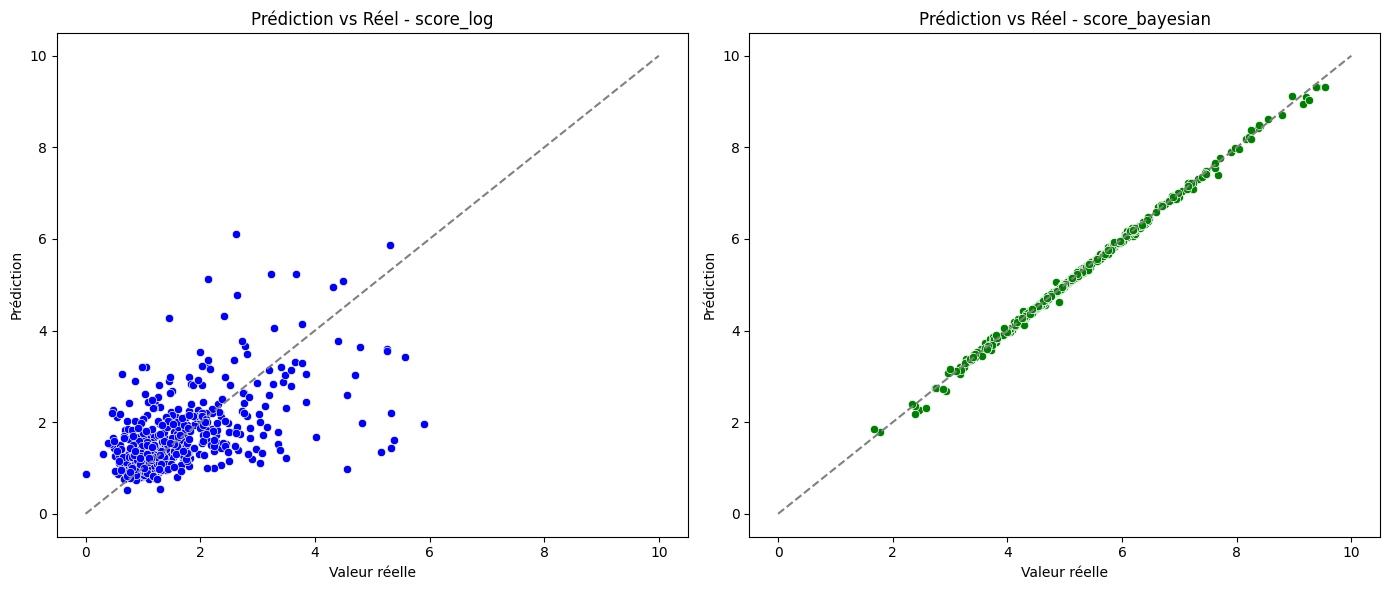

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

# Données pour score_log
features_log = ['vote_count', 'vote_average', 'budget', 'revenue', 'profit', 'runtime', 'release_year']
X_log = df1[features_log].dropna()
y_log = df1.loc[X_log.index, 'score_log']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
model_log = LGBMRegressor(random_state=42)
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

# Données pour score_bayesian
features_bayes = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month']
X_bayes = df1[features_bayes].dropna()
y_bayes = df1.loc[X_bayes.index, 'score_bayesian']

X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)
model_bayes = LGBMRegressor(random_state=42)
model_bayes.fit(X_train_bayes, y_train_bayes)
y_pred_bayes = model_bayes.predict(X_test_bayes)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1 - score_log
sns.scatterplot(x=y_test_log, y=y_pred_log, ax=axes[0], color='blue')
axes[0].plot([0, 10], [0, 10], '--', color='gray')
axes[0].set_title("Prédiction vs Réel - score_log")
axes[0].set_xlabel("Valeur réelle")
axes[0].set_ylabel("Prédiction")

# Graph 2 - score_bayesian
sns.scatterplot(x=y_test_bayes, y=y_pred_bayes, ax=axes[1], color='green')
axes[1].plot([0, 10], [0, 10], '--', color='gray')
axes[1].set_title("Prédiction vs Réel - score_bayesian")
axes[1].set_xlabel("Valeur réelle")
axes[1].set_ylabel("Prédiction")

plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 1844, number of used features: 6
[LightGBM] [Info] Start training from score 5.110539


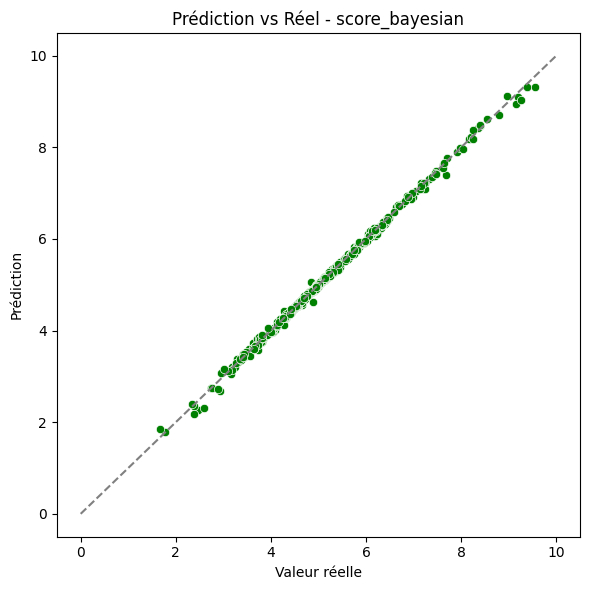

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

# Données pour score_bayesian
features_bayes = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month']
X_bayes = df1[features_bayes].dropna()
y_bayes = df1.loc[X_bayes.index, 'score_bayesian']

# Entraînement
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)
model_bayes = LGBMRegressor(random_state=42)
model_bayes.fit(X_train_bayes, y_train_bayes)
y_pred_bayes = model_bayes.predict(X_test_bayes)

# Visualisation
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_bayes, y=y_pred_bayes, color='green')
plt.plot([0, 10], [0, 10], '--', color='gray')
plt.title("Prédiction vs Réel - score_bayesian")
plt.xlabel("Valeur réelle")
plt.ylabel("Prédiction")
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 1844, number of used features: 10
[LightGBM] [Info] Start training from score 1.685159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 1844, number of used features: 10
[LightGBM] [Info] Start training from score 5.110539
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 1844, number of used features: 10
[LightGBM] [Info] Start traini

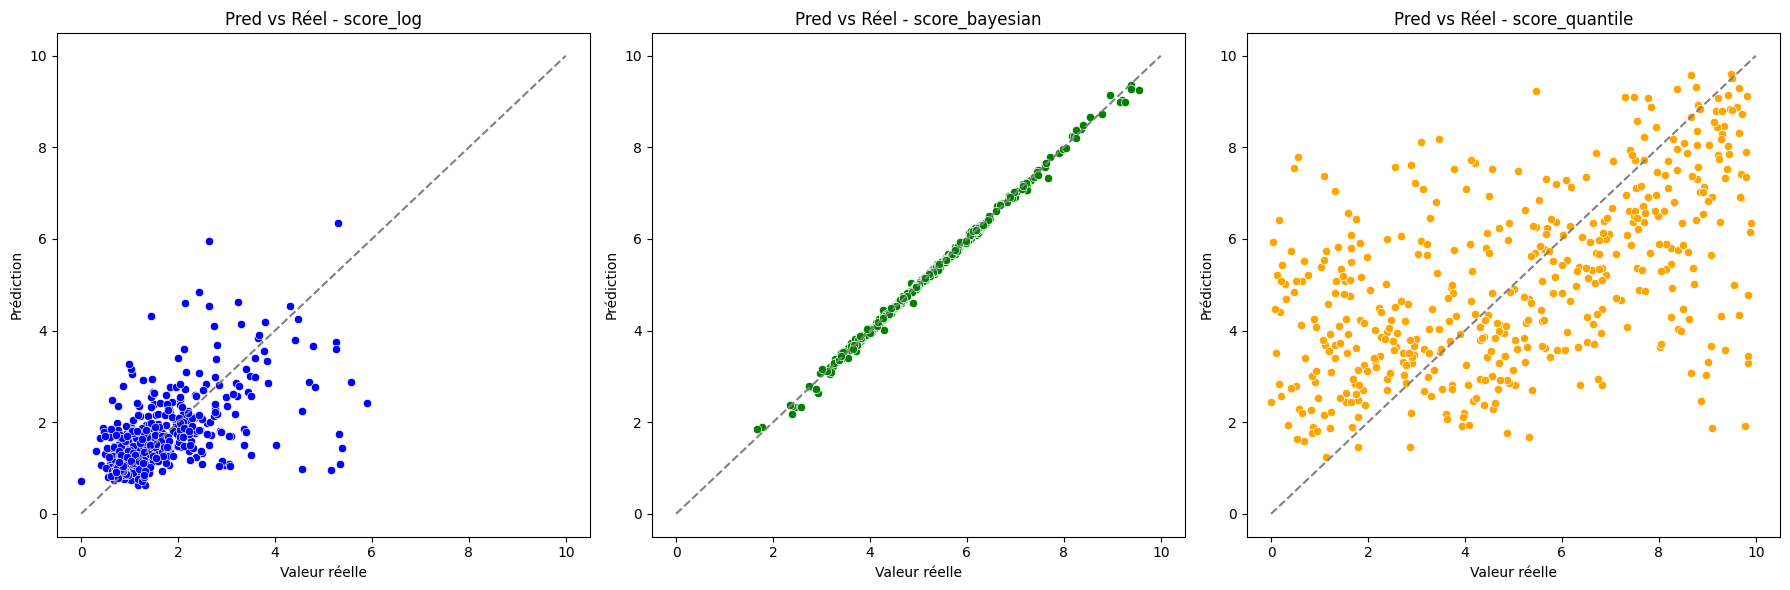

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

# --- 1. score_log ---
features_log = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year', 'prod_company_1_encoded', 'prod_company_2_encoded']
X_log = df1[features_log].dropna()
y_log = df1.loc[X_log.index, 'score_log']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
model_log = LGBMRegressor(random_state=42)
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

# --- 2. score_bayesian ---
features_bayes = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year', 'prod_company_1_encoded', 'prod_company_2_encoded']
X_bayes = df1[features_bayes].dropna()
y_bayes = df1.loc[X_bayes.index, 'score_bayesian']
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)
model_bayes = LGBMRegressor(random_state=42)
model_bayes.fit(X_train_bayes, y_train_bayes)
y_pred_bayes = model_bayes.predict(X_test_bayes)

# --- 3. score_quantile ---
features_quantile = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year', 'prod_company_1_encoded', 'prod_company_2_encoded']
X_quantile = df1[features_quantile].dropna()
y_quantile = df1.loc[X_quantile.index, 'score_quantile']
X_train_quant, X_test_quant, y_train_quant, y_test_quant = train_test_split(X_quantile, y_quantile, test_size=0.2, random_state=42)
model_quantile = LGBMRegressor(random_state=42)
model_quantile.fit(X_train_quant, y_train_quant)
y_pred_quant = model_quantile.predict(X_test_quant)

# --- Visualisation ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# score_log
sns.scatterplot(x=y_test_log, y=y_pred_log, ax=axes[0], color='blue')
axes[0].plot([0, 10], [0, 10], '--', color='gray')
axes[0].set_title("Pred vs Réel - score_log")
axes[0].set_xlabel("Valeur réelle")
axes[0].set_ylabel("Prédiction")

# score_bayesian
sns.scatterplot(x=y_test_bayes, y=y_pred_bayes, ax=axes[1], color='green')
axes[1].plot([0, 10], [0, 10], '--', color='gray')
axes[1].set_title("Pred vs Réel - score_bayesian")
axes[1].set_xlabel("Valeur réelle")
axes[1].set_ylabel("Prédiction")

# score_quantile
sns.scatterplot(x=y_test_quant, y=y_pred_quant, ax=axes[2], color='orange')
axes[2].plot([0, 10], [0, 10], '--', color='gray')
axes[2].set_title("Pred vs Réel - score_quantile")
axes[2].set_xlabel("Valeur réelle")
axes[2].set_ylabel("Prédiction")

plt.tight_layout()
plt.show()


In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Variables les plus corrélées avec score_log
features_log = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year', 'prod_company_freq', 'prod_country_freq','genre_impact_score']

# Sélection des données
X_log = df1[features_log].dropna()
y_log = df1.loc[X_log.index, 'score_log']

# Split et entraînement
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
model_log = XGBRegressor(random_state=42)
model_log.fit(X_train_log, y_train_log)

# Prédictions et évaluation
y_pred_log = model_log.predict(X_test_log)
print("🔹 XGBoost - score_log")
print("R² :", r2_score(y_test_log, y_pred_log))
print("RMSE :", mean_squared_error(y_test_log, y_pred_log) ** 0.5)


🔹 XGBoost - score_log
R² : 0.12905722657463214
RMSE : 0.9377492121805907


In [77]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Définition des features les plus corrélées
features_log = [
    'vote_count', 'vote_average', 'revenue', 'runtime', 'profit',
    'release_month', 'budget', 'release_year',
    'prod_company_freq', 'prod_country_freq', 'genre_impact_score'
]

# Préparation des données
X_log = df1[features_log].dropna()
y_log = df1.loc[X_log.index, 'score_log']

# Split train/test
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Entraînement du modèle XGBoost
model_log_xgb = XGBRegressor(random_state=42)
model_log_xgb.fit(X_train_log, y_train_log)

# Prédiction
y_pred_log = model_log_xgb.predict(X_test_log)

# Évaluation
print("🔹 XGBoost - score_log")
print("R² :", r2_score(y_test_log, y_pred_log))
print("RMSE :", mean_squared_error(y_test_log, y_pred_log) ** 0.5)

# Sauvegarde du modèle
joblib.dump(model_log_xgb, 'model_log_xgb.pkl')


🔹 XGBoost - score_log
R² : 0.12905722657463214
RMSE : 0.9377492121805907


['model_log_xgb.pkl']

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Variables les plus corrélées avec score_bayesian
features_bayes =[ 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year','prod_company_freq', 'prod_country_freq','genre_impact_score']

# Sélection des données
X_bayes = df1[features_bayes].dropna()
y_bayes = df1.loc[X_bayes.index, 'score_bayesian']

# Split et entraînement
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)
model_bayes = XGBRegressor(random_state=42)
model_bayes.fit(X_train_bayes, y_train_bayes)

# Prédictions et évaluation
y_pred_bayes = model_bayes.predict(X_test_bayes)
print("🔹 XGBoost - score_bayesian")
print("R² :", r2_score(y_test_bayes, y_pred_bayes))
print("RMSE :", mean_squared_error(y_test_bayes, y_pred_bayes) ** 0.5)


🔹 XGBoost - score_bayesian
R² : 0.265781195476144
RMSE : 1.0520955046234635


In [78]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Définition des features les plus corrélées
features_bayes = [
    'vote_count', 'vote_average', 'revenue', 'runtime', 'profit',
    'release_month', 'budget', 'release_year',
    'prod_company_freq', 'prod_country_freq', 'genre_impact_score'
]

# Préparation des données
X_bayes = df1[features_bayes].dropna()
y_bayes = df1.loc[X_bayes.index, 'score_bayesian']

# Split train/test
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)

# Entraînement du modèle XGBoost
model_bayes_xgb = XGBRegressor(random_state=42)
model_bayes_xgb.fit(X_train_bayes, y_train_bayes)

# Prédiction
y_pred_bayes = model_bayes_xgb.predict(X_test_bayes)

# Évaluation
print("🔹 XGBoost - score_bayesian")
print("R² :", r2_score(y_test_bayes, y_pred_bayes))
print("RMSE :", mean_squared_error(y_test_bayes, y_pred_bayes) ** 0.5)

# Sauvegarde du modèle
joblib.dump(model_bayes_xgb, 'model_bayes_xgb.pkl')


🔹 XGBoost - score_bayesian
R² : 0.9969979761012461
RMSE : 0.06727434622401175


['model_bayes_xgb.pkl']

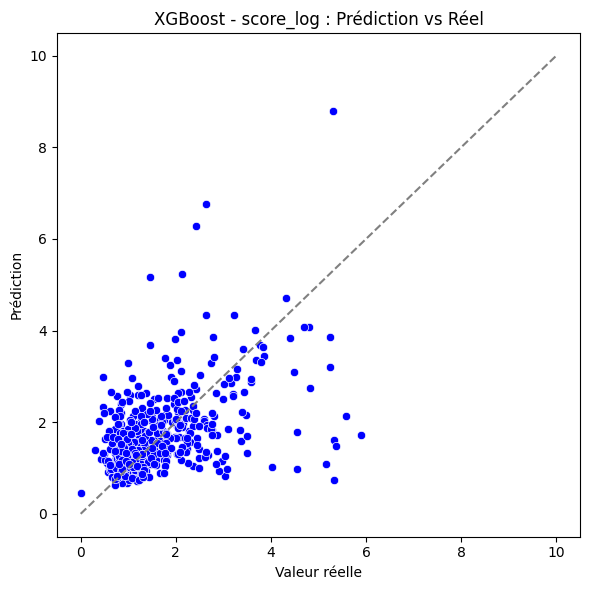

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Données et features
features_log = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year', 'prod_company_1_encoded', 'prod_company_2_encoded']
X_log = df1[features_log].dropna()
y_log = df1.loc[X_log.index, 'score_log']

# Split et entraînement
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
model_log = XGBRegressor(random_state=42)
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

# Graphe
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_log, y=y_pred_log, color='blue')
plt.plot([0, 10], [0, 10], '--', color='gray')
plt.title("XGBoost - score_log : Prédiction vs Réel")
plt.xlabel("Valeur réelle")
plt.ylabel("Prédiction")
plt.tight_layout()
plt.show()


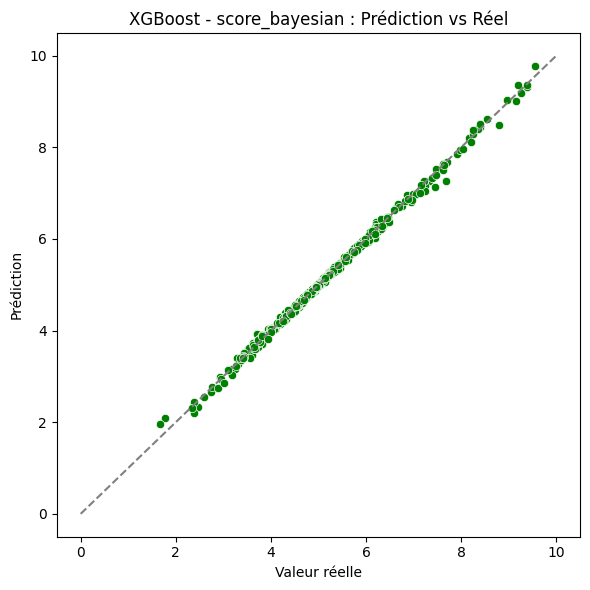

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Données et features
features_bayes = ['vote_count', 'vote_average', 'revenue', 'runtime', 'profit', 'release_month', 'budget', 'release_year', 'prod_company_1_encoded', 'prod_company_2_encoded']
X_bayes = df1[features_bayes].dropna()
y_bayes = df1.loc[X_bayes.index, 'score_bayesian']

# Split et entraînement
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)
model_bayes = XGBRegressor(random_state=42)
model_bayes.fit(X_train_bayes, y_train_bayes)
y_pred_bayes = model_bayes.predict(X_test_bayes)

# Graphe
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_bayes, y=y_pred_bayes, color='green')
plt.plot([0, 10], [0, 10], '--', color='gray')
plt.title("XGBoost - score_bayesian : Prédiction vs Réel")
plt.xlabel("Valeur réelle")
plt.ylabel("Prédiction")
plt.tight_layout()
plt.show()


In [46]:
df1.columns

Index(['release_date', 'genres', 'popularity', 'vote_count', 'vote_average',
       'genre_names', 'popularity_score', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'release_year',
       'release_month', 'budget', 'revenue', 'runtime', 'production_companies',
       'production_countries', 'score_minmax', 'score_quantile', 'score_log',
       'score_bayesian', 'profit', 'prod_company_1', 'prod_company_2',
       'prod_company_1_encoded', 'prod_company_2_encoded', 'prod_country_1',
       'prod_country_2', 'prod_country_1_encoded', 'prod_country_2_encoded',
       'prod_country_freq', 'prod_company_freq', 'genre_names_clean',
       'genre_1', 'genre_2', 'genre_3', 'genre_freq', 'genre_weighted_score',
       'genre_impact_score'],
      dtype='object')